In [1]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


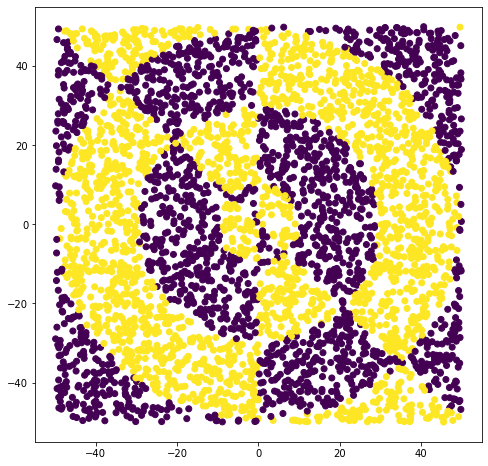

In [2]:
%run nonlinear_function.py

TYPE=2

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 1.0
[6.77250291 9.5544703 ] 0.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

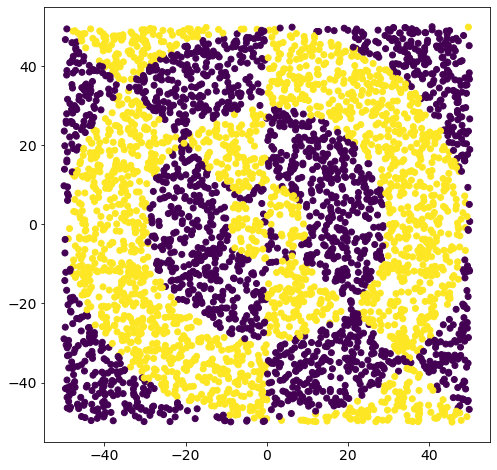

In [4]:
#keras work with numpy arrays: just use them from the start
TYPE=2
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [5]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [6]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [7]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from keras.layers import Dropout
from keras.constraints import maxnorm

In [8]:
def create_model(activation='relu', optimizer='adam', n_layers=4, neurons=20, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(2, input_shape=(2,), activation='relu'))
    for i in range(n_layers):
            model.add(Dense(neurons, activation=activation))
            
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, epochs=400, batch_size=50, verbose=0)
# define the grid search parameters

#activation1 = [ 'sigmoid','relu','elu','softmax', 'tanh']
activation = [ 'sigmoid','relu','elu']

optimizer = ['adam', 'RMSprop', 'Nesterov']

dropout_rate = [ 0.2, 0.4, 0.6]
#weight_constraint = [1,3,5]

n_layers=[4,6,8]

neurons = [20, 25, 30]

#batch_size = [50,70,90]
#epochs = [200, 400, 500]

param_grid = dict(activation=activation, optimizer=optimizer, n_layers=n_layers, neurons=neurons, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<ipython-input-8-7946b6e9417d>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=400, batch_size=50, verbose=0)
/home/reza/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/reza/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.55907043 0.63375658        nan 0.60624671 0.57218752        nan
 0.65060343 0.64437972        nan 0.59623518 0.59469398        nan
 0.64844624 0.60248468        nan 0.56376936 0.58592824        nan
 0.54405665 0.62313491        nan 0.51031399 0.52219641        nan
 0.55502943

Best: 0.783760 using {'activation': 'relu', 'dropout_rate': 0.6, 'n_layers': 4, 'neurons': 30, 'optimizer': 'adam'}
0.559070 (0.031598) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'adam'}
0.633757 (0.054854) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'RMSprop'}
nan (nan) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'Nesterov'}
0.606247 (0.031135) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 25, 'optimizer': 'adam'}
0.572188 (0.019513) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 25, 'optimizer': 'RMSprop'}
nan (nan) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 25, 'optimizer': 'Nesterov'}
0.650603 (0.048879) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 30, 'optimizer': 'adam'}
0.644380 (0.051995) wi